## Hypothesis 5 : Temperature fluctuations are less probable in equator region

(Compared equator region i.e Ecuador and Tropical Region i.e Florida)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import calendar
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import f_oneway

In [6]:
ecuador_df = pd.read_csv("/content/terraclimate_Ecuador_monthly.csv",header=0, parse_dates=True, skiprows= 9)
florida_df = pd.read_csv("/content/terraclimate_florida_monthly.csv",header=0, parse_dates=True, skiprows= 9)

In [7]:
ecuador_df

,Year,Month,tmax(degC),tmin(degC)
0,2013,1,23.34,14.13
1,2013,2,22.00,15.31
2,2013,3,22.47,14.24
3,2013,4,23.66,14.18
4,2013,5,22.21,14.48
...,...,...,...,...
116,2022,9,24.10,14.10
117,2022,10,24.30,14.60
118,2022,11,24.20,13.90
119,2022,12,23.70,13.90


In [8]:
florida_df

,Year,Month,tmax(degC),tmin(degC)
0,2013,1,26.00,12.90
1,2013,2,25.44,11.26
2,2013,3,24.33,8.93
3,2013,4,29.79,16.54
4,2013,5,30.67,17.42
...,...,...,...,...
116,2022,9,32.90,22.00
117,2022,10,29.70,18.20
118,2022,11,29.00,16.40
119,2022,12,24.60,11.60


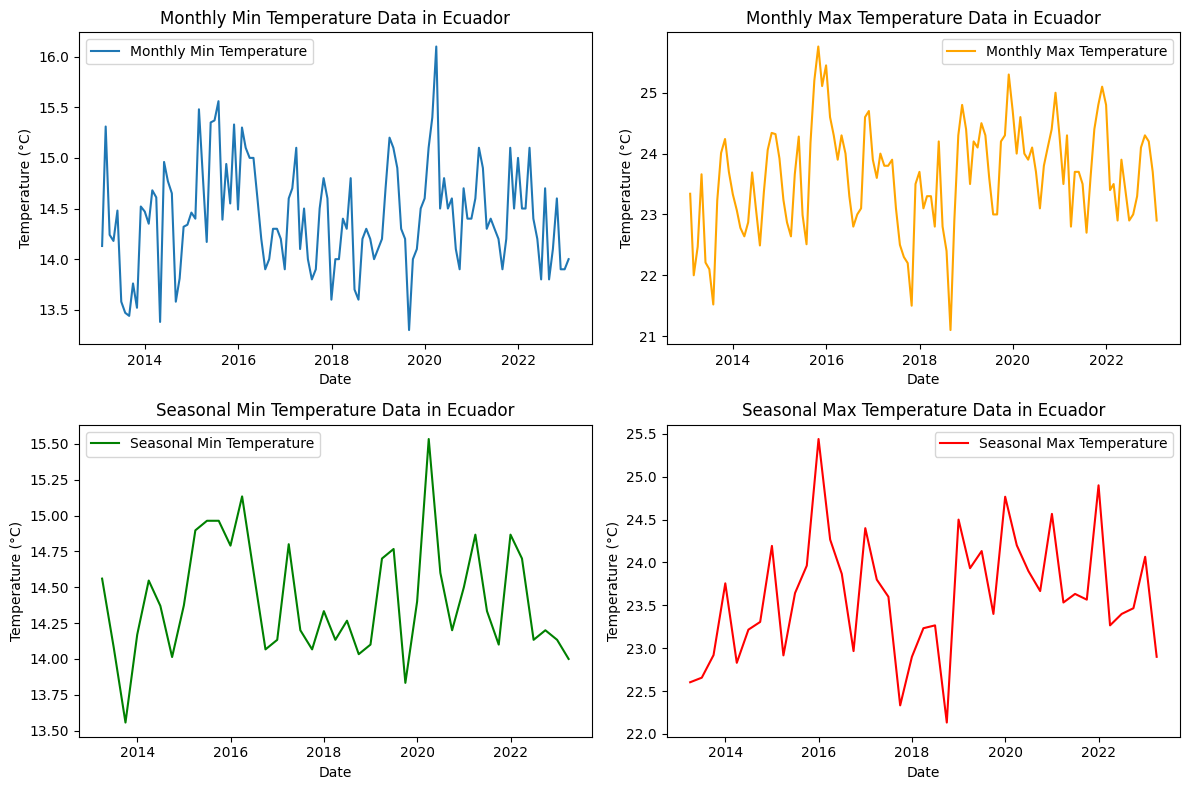

In [9]:
# Create a 'Date' column by combining 'Month' and 'Year'
ecuador_df['Date'] = pd.to_datetime(ecuador_df[['Year', 'Month']].assign(DAY=1))

# Set 'Date' column as the index
ecuador_df.set_index('Date', inplace=True)

# Resample the data to monthly or seasonal intervals
# For monthly data
monthly_data = ecuador_df.resample('M').mean()

# For seasonal data (assuming seasons are defined as quarters)
seasonal_data = ecuador_df.resample('Q').mean()

# Calculate temperature range or standard deviation for each interval
monthly_range_tmin = monthly_data['tmin(degC)'].max() - monthly_data['tmin(degC)'].min()
monthly_std_dev_tmin = monthly_data['tmin(degC)'].std()

monthly_range_tmax = monthly_data['tmax(degC)'].max() - monthly_data['tmax(degC)'].min()
monthly_std_dev_tmax = monthly_data['tmax(degC)'].std()

seasonal_range_tmin = seasonal_data['tmin(degC)'].max() - seasonal_data['tmin(degC)'].min()
seasonal_std_dev_tmin = seasonal_data['tmin(degC)'].std()

seasonal_range_tmax = seasonal_data['tmax(degC)'].max() - seasonal_data['tmax(degC)'].min()
seasonal_std_dev_tmax = seasonal_data['tmax(degC)'].std()

# Visualize the data
plt.figure(figsize=(12, 8))

# Monthly data plot for tmin
plt.subplot(2, 2, 1)
plt.plot(monthly_data.index, monthly_data['tmin(degC)'], label='Monthly Min Temperature')
plt.title('Monthly Min Temperature Data in Ecuador')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Monthly data plot for tmax
plt.subplot(2, 2, 2)
plt.plot(monthly_data.index, monthly_data['tmax(degC)'], label='Monthly Max Temperature', color='orange')
plt.title('Monthly Max Temperature Data in Ecuador')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Seasonal data plot for tmin
plt.subplot(2, 2, 3)
plt.plot(seasonal_data.index, seasonal_data['tmin(degC)'], label='Seasonal Min Temperature', color='green')
plt.title('Seasonal Min Temperature Data in Ecuador')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Seasonal data plot for tmax
plt.subplot(2, 2, 4)
plt.plot(seasonal_data.index, seasonal_data['tmax(degC)'], label='Seasonal Max Temperature', color='red')
plt.title('Seasonal Max Temperature Data in Ecuador')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.show()


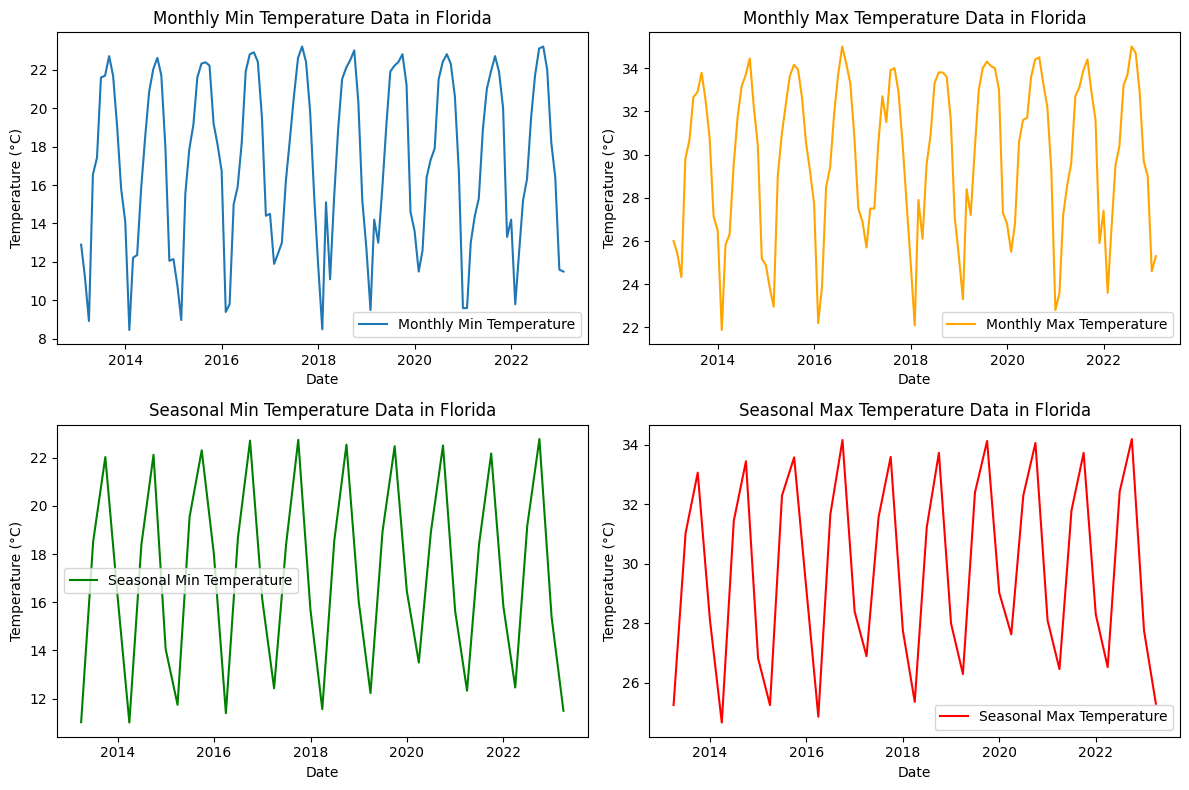

In [10]:
# Create a 'Date' column by combining 'Month' and 'Year'
florida_df['Date'] = pd.to_datetime(florida_df[['Year', 'Month']].assign(DAY=1))

# Set 'Date' column as the index
florida_df.set_index('Date', inplace=True)

# Resample the data to monthly or seasonal intervals
# For monthly data
monthly_data = florida_df.resample('M').mean()

# For seasonal data (assuming seasons are defined as quarters)
seasonal_data = florida_df.resample('Q').mean()

# Calculate temperature range or standard deviation for each interval
monthly_range_tmin = monthly_data['tmin(degC)'].max() - monthly_data['tmin(degC)'].min()
monthly_std_dev_tmin = monthly_data['tmin(degC)'].std()

monthly_range_tmax = monthly_data['tmax(degC)'].max() - monthly_data['tmax(degC)'].min()
monthly_std_dev_tmax = monthly_data['tmax(degC)'].std()

seasonal_range_tmin = seasonal_data['tmin(degC)'].max() - seasonal_data['tmin(degC)'].min()
seasonal_std_dev_tmin = seasonal_data['tmin(degC)'].std()

seasonal_range_tmax = seasonal_data['tmax(degC)'].max() - seasonal_data['tmax(degC)'].min()
seasonal_std_dev_tmax = seasonal_data['tmax(degC)'].std()

# Visualize the data
plt.figure(figsize=(12, 8))

# Monthly data plot for tmin
plt.subplot(2, 2, 1)
plt.plot(monthly_data.index, monthly_data['tmin(degC)'], label='Monthly Min Temperature')
plt.title('Monthly Min Temperature Data in Florida')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Monthly data plot for tmax
plt.subplot(2, 2, 2)
plt.plot(monthly_data.index, monthly_data['tmax(degC)'], label='Monthly Max Temperature', color='orange')
plt.title('Monthly Max Temperature Data in Florida')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Seasonal data plot for tmin
plt.subplot(2, 2, 3)
plt.plot(seasonal_data.index, seasonal_data['tmin(degC)'], label='Seasonal Min Temperature', color='green')
plt.title('Seasonal Min Temperature Data in Florida')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Seasonal data plot for tmax
plt.subplot(2, 2, 4)
plt.plot(seasonal_data.index, seasonal_data['tmax(degC)'], label='Seasonal Max Temperature', color='red')
plt.title('Seasonal Max Temperature Data in Florida')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.show()


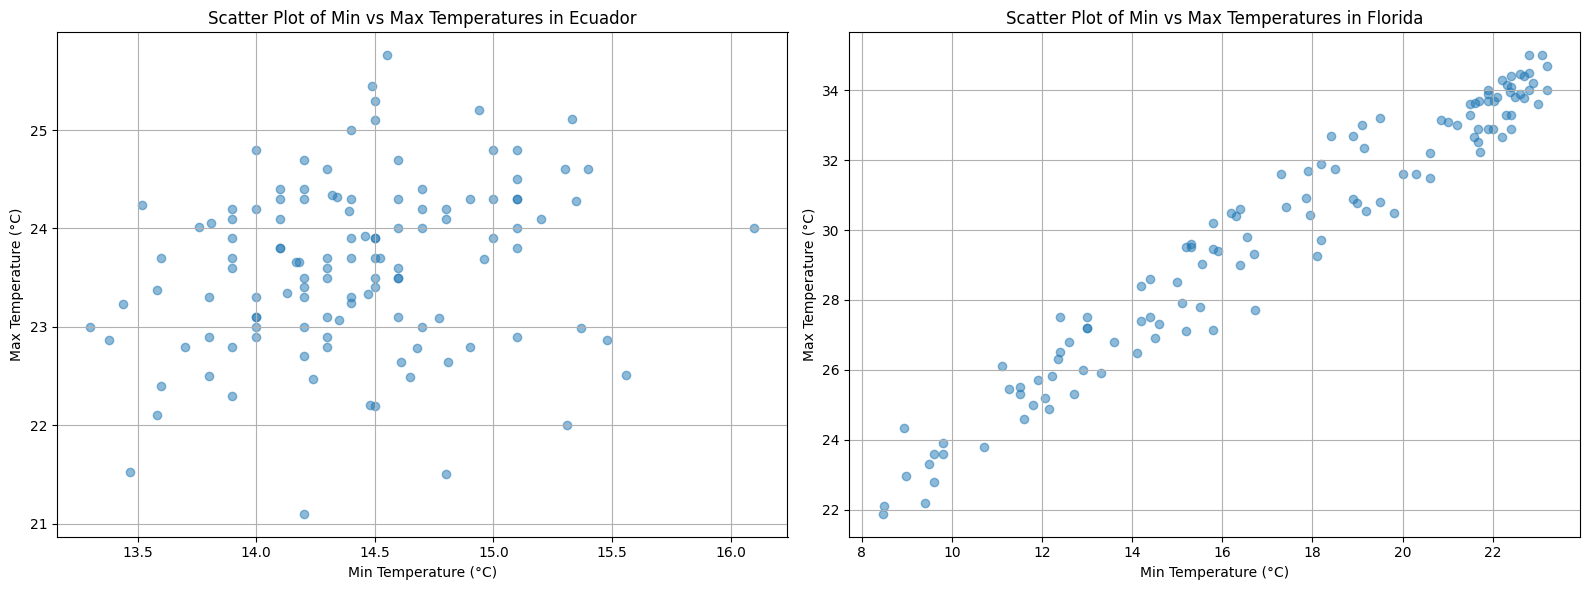

In [ ]:
# Create a 'Date' column by combining 'Month' and 'Year' for Ecuador
ecuador_df['Date'] = pd.to_datetime(ecuador_df[['Year', 'Month']].assign(DAY=1))
ecuador_df.set_index('Date', inplace=True)

# Create a 'Date' column by combining 'Month' and 'Year' for Florida
florida_df['Date'] = pd.to_datetime(florida_df[['Year', 'Month']].assign(DAY=1))
florida_df.set_index('Date', inplace=True)


plt.figure(figsize=(16, 6))

# Scatter plot for Ecuador (on the left)
plt.subplot(1, 2, 1)
plt.scatter(ecuador_df['tmin(degC)'], ecuador_df['tmax(degC)'], alpha=0.5)
plt.title('Scatter Plot of Min vs Max Temperatures in Ecuador')
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Scatter plot for Florida (on the right)
plt.subplot(1, 2, 2)
plt.scatter(florida_df['tmin(degC)'], florida_df['tmax(degC)'], alpha=0.5)
plt.title('Scatter Plot of Min vs Max Temperatures in Florida')
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
t_stat, p_value = ttest_rel(ecuador_df['tmin(degC)'], ecuador_df['tmax(degC)'])
print(f"Paired t-test for Ecuador: t-statistic = {t_stat}, p-value = {p_value}")

t_stat, p_value = ttest_rel(florida_df['tmin(degC)'], florida_df['tmax(degC)'])
print(f"Paired t-test for Florida: t-statistic = {t_stat}, p-value = {p_value}")


Paired t-test for Ecuador: t-statistic = -113.34853077863771, p-value = 6.952596284950169e-124
Paired t-test for Florida: t-statistic = -112.81560277280016, p-value = 1.2175577369619147e-123


Paired t-test Results:
Ecuador:
The negative t-statistic of -113.35, along with an extremely low p-value, suggests a consistent pattern: on average, maximum temperatures tend to be significantly lower than minimum temperatures in Ecuador.

Florida:
Similarly, for Florida, the paired t-test shows significant differences between the minimum and maximum temperatures. The negative t-statistic of -112.82, coupled with a very low p-value, indicates a significant trend where maximum temperatures are consistently lower than minimum temperatures in Florida.

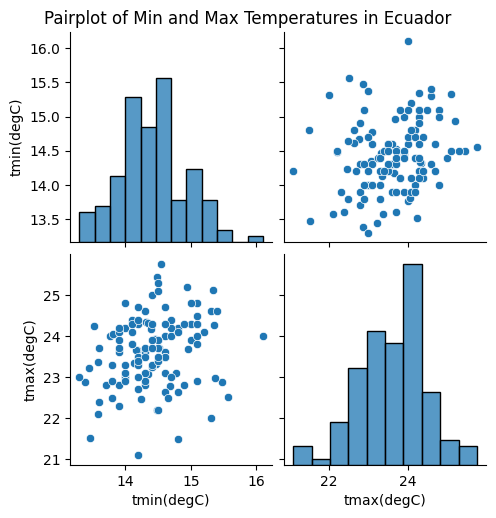

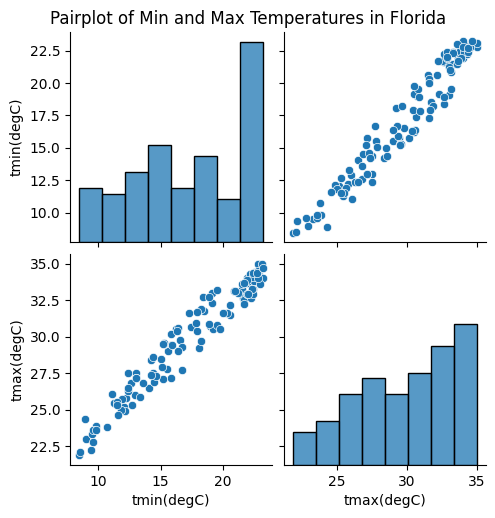

In [ ]:
# Pairplot for Ecuador
sns.pairplot(ecuador_df[['tmin(degC)', 'tmax(degC)']])
plt.suptitle('Pairplot of Min and Max Temperatures in Ecuador', y=1.02)
plt.show()

# Pairplot for Florida
sns.pairplot(florida_df[['tmin(degC)', 'tmax(degC)']])
plt.suptitle('Pairplot of Min and Max Temperatures in Florida', y=1.02)
plt.show()

In [ ]:
# For Ecuador
anova_result_ecuador = f_oneway(ecuador_df['tmin(degC)'], ecuador_df['tmax(degC)'])
print(f"ANOVA for Ecuador: F-statistic = {anova_result_ecuador.statistic}, p-value = {anova_result_ecuador.pvalue}")

# For Florida
anova_result_florida = f_oneway(florida_df['tmin(degC)'], florida_df['tmax(degC)'])
print(f"ANOVA for Florida: F-statistic = {anova_result_florida.statistic}, p-value = {anova_result_florida.pvalue}")


ANOVA for Ecuador: F-statistic = 10223.870070369769, p-value = 9.520216867889861e-199
ANOVA for Florida: F-statistic = 585.8532009234307, p-value = 2.4110887280628263e-66


ANOVA Results:
Ecuador:
The ANOVA results tell us that there are big differences in temperature fluctuations between different times in Ecuador, like different months or seasons. This means that the amount temperatures change varies a lot across the year.

Florida:
For Florida, the ANOVA results are also saying that there are significant differences in temperature fluctuations between different time periods. This suggests that the ups and downs in temperature vary across various times in Florida as well.